In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48f60651e46d8d5dad131a0eacc82603


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | dipkarpaz
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | north bend
Processing Record 5 of Set 1 | funtua
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | ugoofaaru
Processing Record 8 of Set 1 | cabano
Processing Record 9 of Set 1 | along
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | graham
Processing Record 13 of Set 1 | le port
Processing Record 14 of Set 1 | high prairie
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | yarmouth
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | jiuquan
Processing Record 22 of Set 1 | iralaya
Processing Re

Processing Record 42 of Set 4 | san jeronimo
Processing Record 43 of Set 4 | saraza
Processing Record 44 of Set 4 | lyubim
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | axim
Processing Record 47 of Set 4 | saint anthony
Processing Record 48 of Set 4 | batouri
Processing Record 49 of Set 4 | marsh harbour
Processing Record 50 of Set 4 | atambua
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | vestmanna
Processing Record 3 of Set 5 | panzhihua
Processing Record 4 of Set 5 | banff
Processing Record 5 of Set 5 | san quintin
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | norman wells
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | husavik
Processing Record 10 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 11 of Set 5 | asau
Processing Record 12 of Set 5 | samusu
City not found. Skipping...
Processing Record 13 of Set 5 | dingle
Processing Record 14 of Set 5 | rio g

Processing Record 29 of Set 8 | neuquen
Processing Record 30 of Set 8 | yankton
Processing Record 31 of Set 8 | nanortalik
Processing Record 32 of Set 8 | preobrazhenskaya
City not found. Skipping...
Processing Record 33 of Set 8 | nyurba
Processing Record 34 of Set 8 | oranjemund
Processing Record 35 of Set 8 | astoria
Processing Record 36 of Set 8 | west bay
Processing Record 37 of Set 8 | ouesso
Processing Record 38 of Set 8 | tiznit
Processing Record 39 of Set 8 | verkhoyansk
Processing Record 40 of Set 8 | itacoatiara
Processing Record 41 of Set 8 | sandpoint
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | tyubuk
Processing Record 45 of Set 8 | zyryanka
Processing Record 46 of Set 8 | grants
Processing Record 47 of Set 8 | zheshart
Processing Record 48 of Set 8 | sayyan
Processing Record 49 of Set 8 | sydney
Processing Record 50 of Set 8 | zherdevka
Processing Record 1 of

Processing Record 17 of Set 12 | cangucu
Processing Record 18 of Set 12 | narsingi
Processing Record 19 of Set 12 | dwarka
Processing Record 20 of Set 12 | robe
Processing Record 21 of Set 12 | yumen
Processing Record 22 of Set 12 | gushikawa
Processing Record 23 of Set 12 | sabya
Processing Record 24 of Set 12 | bilma
Processing Record 25 of Set 12 | srandakan
Processing Record 26 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 27 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 28 of Set 12 | barentu
Processing Record 29 of Set 12 | lazaro cardenas
Processing Record 30 of Set 12 | mwandiga
Processing Record 31 of Set 12 | santa cruz cabralia
Processing Record 32 of Set 12 | tazovskiy
Processing Record 33 of Set 12 | isangel
Processing Record 34 of Set 12 | kaspiyskiy
Processing Record 35 of Set 12 | tyrma
Processing Record 36 of Set 12 | manosque
Processing Record 37 of Set 12 | roebourne
Processing Record 38 of Set 12 | pyaozerskiy
Processing 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Comodoro Rivadavia,AR,2021-09-16 22:45:01,-45.8667,-67.5000,62.46,39,20,19.57
1,Atuona,PF,2021-09-16 22:47:37,-9.8000,-139.0333,77.14,80,15,15.86
2,North Bend,US,2021-09-16 22:52:07,43.4065,-124.2243,76.95,50,1,24.16
3,Funtua,NG,2021-09-16 22:52:07,11.5233,7.3081,69.31,96,97,8.08
4,Pevek,RU,2021-09-16 22:47:48,69.7008,170.3133,31.26,78,100,18.16
5,Ugoofaaru,MV,2021-09-16 22:52:08,5.6667,73.0000,82.42,76,69,12.44
6,Cabano,PH,2021-09-16 22:52:08,10.5869,122.7002,77.63,89,100,7.20
7,Along,IN,2021-09-16 22:50:10,28.1667,94.7667,72.09,96,100,1.36
8,Qaanaaq,GL,2021-09-16 22:47:47,77.4840,-69.3632,19.94,79,99,5.32
9,Chokurdakh,RU,2021-09-16 22:48:10,70.6333,147.9167,40.05,82,99,3.89


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

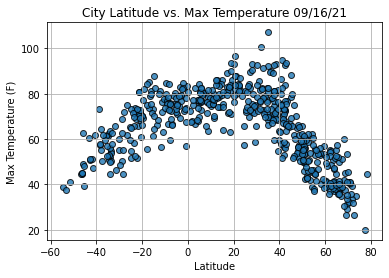

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

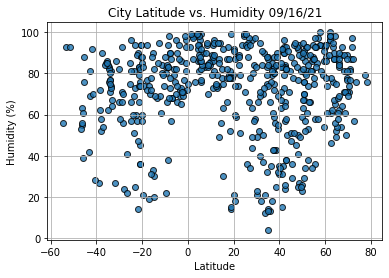

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

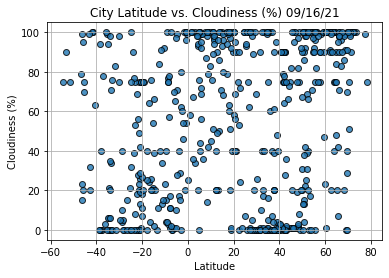

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

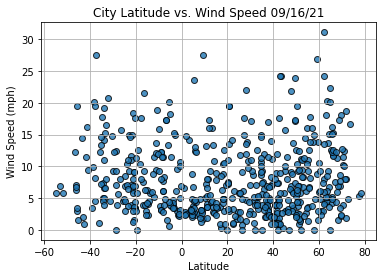

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()